# Steam Flow Data Visualization

This notebook will display steam flow data for the specified date range and location

In [8]:
"""import libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [9]:
df = pd.read_csv("sf_data.csv")#,sep=',',index_col="Date",parse_dates=True)
df.index = df['Date']
df['mwe_total'] = df['Unit1'] + df['Unit2']
df['sf_total'] = df['701'] + df['702']
df['sf_bo_total'] = df['701'] + df['702'] + df['701a'] + df['702a'] + df['701b'] + df['702b'] + \
                    df['701c'] + df['702c']
df['bo_total'] = df['701a'] + df['702a'] + df['701b'] + df['702b'] + df['701c'] + df['702c']
df['pad_e'] = df['301-302'] + df['303_304'] + df['305_306']
df['pad_hf'] = df['401_402'] + df['403_404'] + df['405']
df['sf_prs'] = df['pad_e'] + df['pad_hf'] + df['508']
df['diff_prs_if'] = df['sf_prs'] - df['sf_total']
df['diff_prs_bo'] = df['sf_prs'] - df['sf_bo_total']
df['pdiff_prs_if'] = 100 * (df['sf_prs'] - df['sf_total'])/df['sf_total']
df['pdiff_prs_bo'] = 100 * (df['sf_prs'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_wellhead'] = 1008.2
df['pdiff_bom_if'] = 100 * (df['bom_wellhead'] - df['sf_total'])/df['sf_total']
df['pdiff_bom_bo'] = 100 * (df['bom_wellhead'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_if'] = 977.95
df['bom_pad_e'] = 418.68
df['bom_pad_hf'] = 510.12
df['bom_pad_c'] = 79.2

In [10]:
def get_data(dates, full_df, cols):
    """create a df with the specified date range and variables to plot"""
    #Create a dataframe with the given date range as index
    df = pd.DataFrame(index=dates)
    #Read the WHP data from the .csv file
    df_temp = full_df[cols]
    #Join the given date_range data frame with the imported whp dataframe                    
    df = df.join(df_temp)
    return df

def plot_data(df, ylabel, title):
    #Define size of the plot
    matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
    """Plot stock WHP with a custom title and axis labels"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date", fontsize=16)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
    
def nan_outlier(group, stds):
    """This function will replace outlier with nan; use 1sd:68% 1.96sd:95% 3sd:99%"""
    pd.options.mode.chained_assignment = None  # default='warn'
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group

In [16]:
"""Define Date Range Here"""
start_date = '2016-07-06 00:00:00'      
end_date = '2016-08-29 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')
%matplotlib inline
title = ""
yl_sf = "Steam Flow (TPH)"
yl_mwe = "MWe"
yl_diff = "% Difference"
yl_whp = "WHP (kscg)"

## Steam Flow at Pad E and Pad H+F

             pad_e       pad_hf     bom_pad_e    bom_pad_hf
count  7679.000000  7914.000000  7.920000e+03  7.920000e+03
mean    389.585308   486.357191  4.186800e+02  5.101200e+02
std      74.315789    61.581784  4.814942e-11  8.163230e-11
min       0.000000   247.821515  4.186800e+02  5.101200e+02
25%     401.616325   484.333431  4.186800e+02  5.101200e+02
50%     413.281548   496.660820  4.186800e+02  5.101200e+02
75%     416.399658   520.921749  4.186800e+02  5.101200e+02
max     442.478394   578.217422  4.186800e+02  5.101200e+02


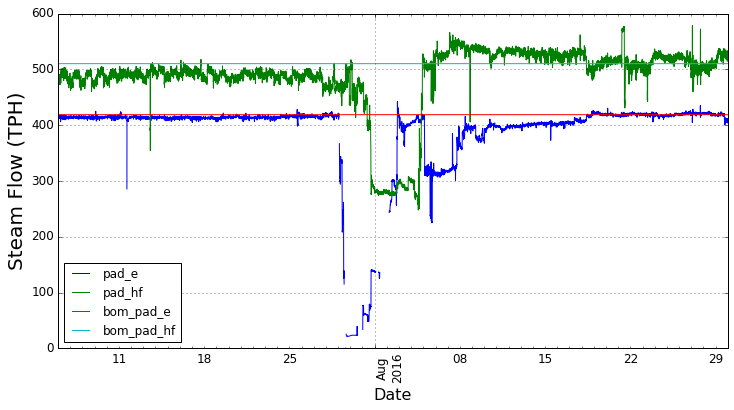

In [12]:
variables = ['Date', 'pad_e', 'pad_hf', 'bom_pad_e', 'bom_pad_hf']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Steam after Pad H and Pad F Separator Stations

           401_402      403_404          405
count  7914.000000  7914.000000  7914.000000
mean    120.464277   141.029411   224.863503
std       8.563185     9.363080    63.716067
min      14.687819     3.175625    -0.574343
25%     116.405703   136.111641   230.544052
50%     122.169167   141.649742   240.259789
75%     125.947090   147.442680   252.647194
max     142.286194   179.821701   316.030792


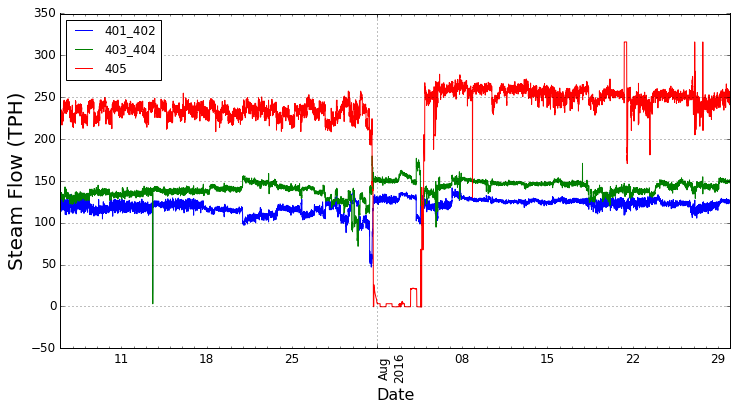

In [13]:
variables = ['Date', '401_402', '403_404', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Pad C Flow Meter

               508     bom_pad_c
count  7914.000000  7.920000e+03
mean     67.900046  7.920000e+01
std      24.735994  7.816464e-13
min       0.083981  7.920000e+01
25%      56.900981  7.920000e+01
50%      63.462038  7.920000e+01
75%      80.968990  7.920000e+01
max     200.544327  7.920000e+01


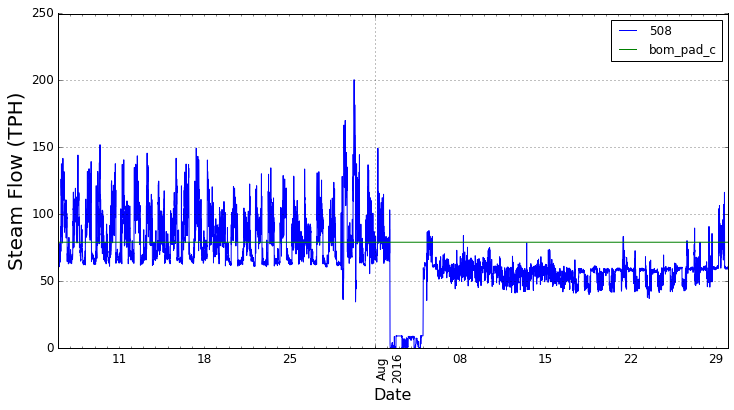

In [15]:
variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Is cycling steam flow data due to cycling WHP of PAL24D?

            PAL24D
count  7914.000000
mean      9.196308
std       1.172854
min       0.807281
25%       8.700859
50%       9.153720
75%       9.688486
max      19.725973


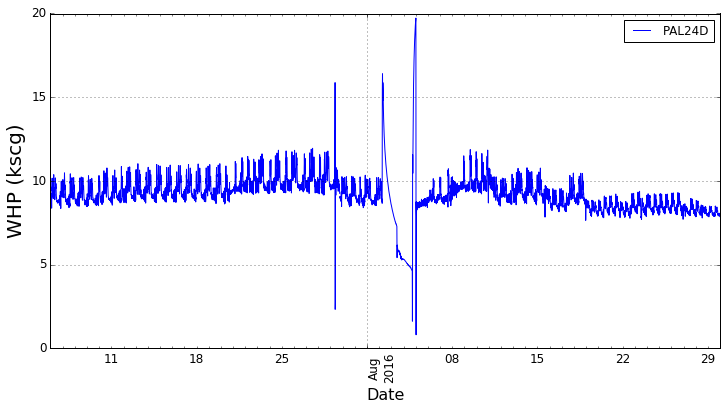

In [17]:
variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_whp, title)

## What is the correlation between Pad C steam flow and PAL24D WHP?

In [18]:
variables = ['Date', '508', 'PAL24D']
df_temp = get_data(dates, df, variables)
df_temp.corr()

,508,PAL24D
508,1.000000,0.302486
PAL24D,0.302486,1.000000


## Steam Flow - WHP trend BEFORE maintenance

               508     bom_pad_c
count  1152.000000  1.152000e+03
mean     85.917451  7.920000e+01
std      18.803678  1.691826e-12
min      61.817738  7.920000e+01
25%      68.774395  7.920000e+01
50%      82.936790  7.920000e+01
75%      98.733269  7.920000e+01
max     149.479614  7.920000e+01


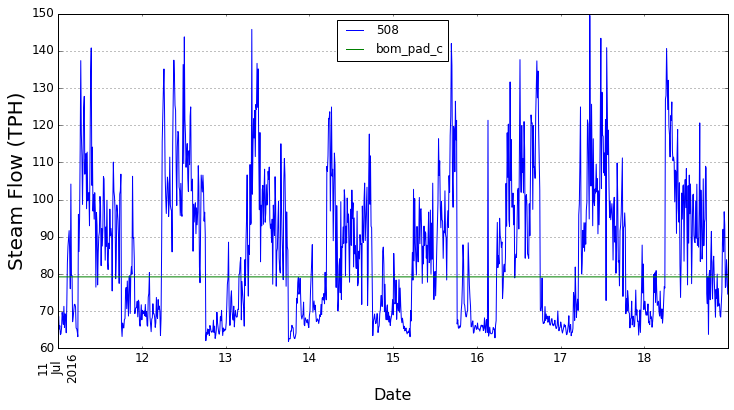

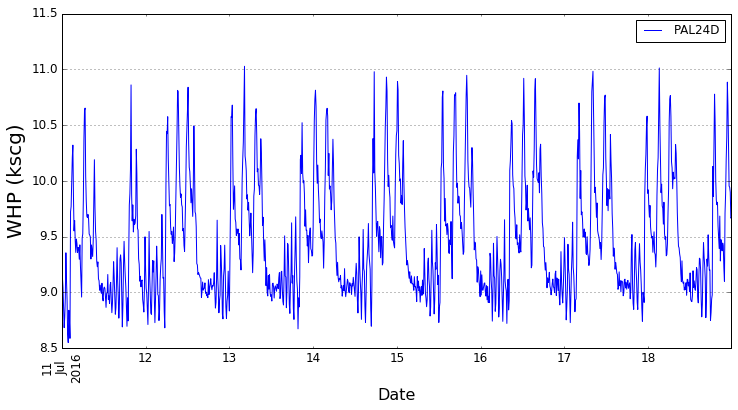

            PAL24D
count  1152.000000
mean      9.475337
std       0.516367
min       8.551404
25%       9.065684
50%       9.347069
75%       9.806219
max      11.027038


In [20]:
"""Define Date Range Here"""
start_date = '2016-07-11 00:00:00'      
end_date = '2016-07-18 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
plot_data(df_temp, yl_whp, title)
print df_temp.describe()

## Steam Flow - WHP trend AFTER maintenance

#### 508 flow meter std decreased from 18.8 to 6.5; mean decreased from 85.9 to 55

               508     bom_pad_c
count  1152.000000  1.152000e+03
mean     55.037121  7.920000e+01
std       6.508449  1.691826e-12
min      37.217323  7.920000e+01
25%      49.516374  7.920000e+01
50%      57.805058  7.920000e+01
75%      59.277765  7.920000e+01
max      83.549797  7.920000e+01


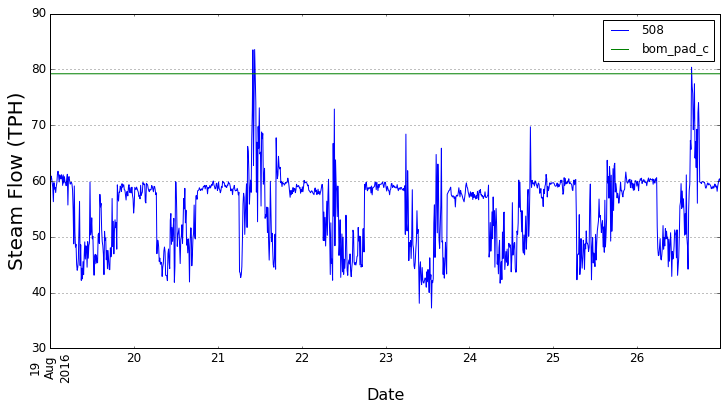

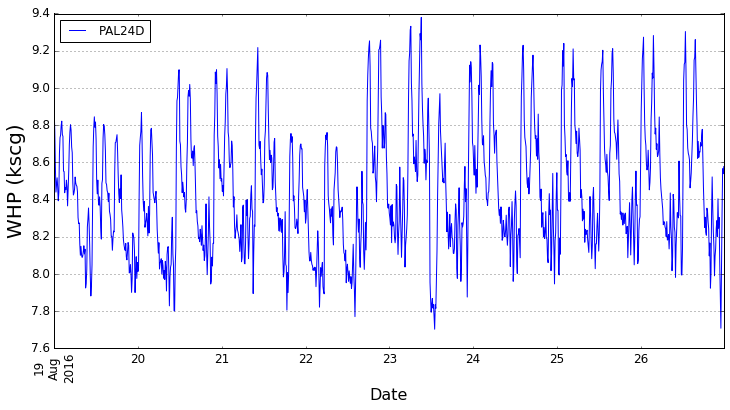

            PAL24D
count  1152.000000
mean      8.446130
std       0.327728
min       7.702615
25%       8.203902
50%       8.396196
75%       8.672827
max       9.379069


In [22]:
"""Define Date Range Here"""
start_date = '2016-08-19 00:00:00'      
end_date = '2016-08-26 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
plot_data(df_temp, yl_whp, title)
print df_temp.describe()

## Pad F (SV 405) steam flow data BEFORE and AFTER maintenance

               405
count  1152.000000
mean    234.944356
std       6.169893
min     208.873795
25%     231.010128
50%     235.330978
75%     239.454525
max     254.853256


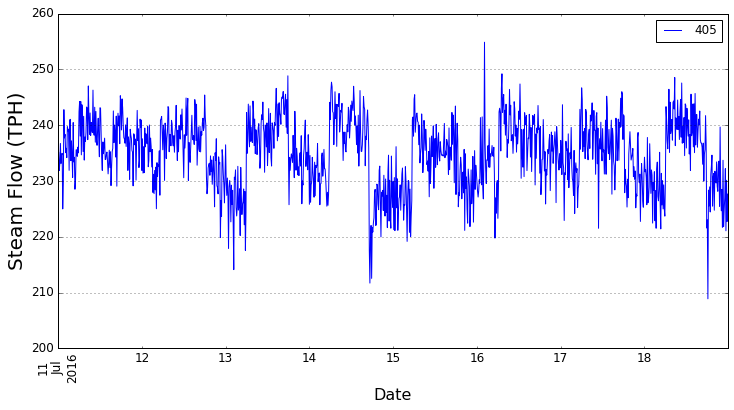

               405
count  1008.000000
mean    255.414778
std       6.744029
min     228.758850
25%     251.863228
50%     256.545990
75%     260.217873
max     271.752655


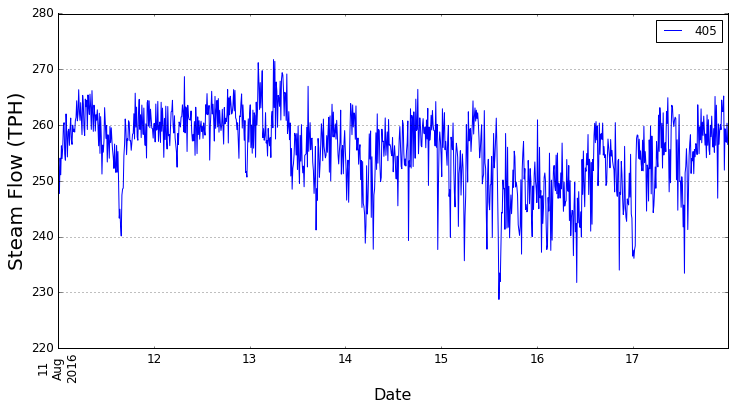

In [25]:
"""Define Date Range Here"""
start_date = '2016-07-11 00:00:00'      
end_date = '2016-07-18 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

"""Define Date Range Here"""
start_date = '2016-08-11 00:00:00'      
end_date = '2016-08-17 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)